In [43]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins 

In [74]:
derecho_calls = pd.read_csv('../data/911_Phone Calls_Derecho_050320_050420.csv')
tornado_calls = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')
derecho_dispatch = pd.read_csv('../data/Computer Aided Dispatch Data_Derecho Incidents 050320-050420.csv', skiprows = 2)
tornado_dispatch = pd.read_csv('../data/Computer Aided Dispatch Data_Tornado Incidents 030320.csv', skiprows = 2)
damage_points = gpd.read_file('../data/damage_points.geojson')
path_polygons = gpd.read_file('../data/path_polygons.geojson')
tornado_paths = gpd.read_file('../data/tornado_paths.geojson')

In [76]:
damage_points['lng'] = damage_points.geometry.y
damage_points['lat'] = damage_points.geometry.x

In [77]:
damage_points_lat_lng = damage_points[['lng','lat']]

<AxesSubplot:>

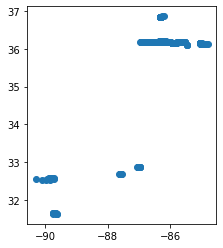

In [78]:
damage_points.plot()

<AxesSubplot:>

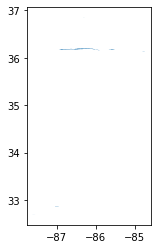

In [79]:
path_polygons.plot()

<AxesSubplot:>

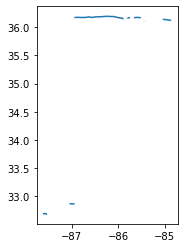

In [80]:
tornado_paths.plot()

In [81]:
damage_points_lat_lng.head(1)

,lng,lat
0,36.18344,-86.51628


In [102]:
map = folium.Map(location = [36.134256, -86.822034], zoom_start = 10)

#folium.GeoJson(damage_points).add_to(map)

folium.GeoJson(path_polygons).add_to(map)

folium.GeoJson(tornado_paths).add_to(map)
#folium.GeoJson(tornado_paths, style_function = lambda x: {'color':'#00FF00', 'fillColor': '#00FF00'}).add_to(map_tornado)

damageArr = damage_points_lat_lng.values
map.add_child(plugins.HeatMap(damageArr, radius = 15))

map

In [96]:
derecho_calls

911 Calls    1549
Name: CallTypeId, dtype: int64

In [99]:
tornado_calls.drop(columns = ['CallTy'])

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector
3,3/3/2020 0:36,911 Calls,NaN,NaN,526 FOUNDRY DR
4,3/3/2020 0:36,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N
...,...,...,...,...,...
470,3/3/2020 4:54,911 Calls,36.142552,-86.635330,WIRELESS CALLER
471,3/3/2020 4:54,911 Calls,36.189415,-86.813557,WIRELESS CALLER
472,3/3/2020 4:55,911 Calls,36.223534,-86.757874,WIRELESS CALLER
473,3/3/2020 4:56,911 Calls,36.168398,-86.783774,600 DR MARTIN L KING JR BLVD - NE


In [100]:
derecho_dispatch

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,5/3/2020 4:31:07 PM,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD
1,5/3/2020 4:32:18 PM,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD
2,5/3/2020 4:32:23 PM,119 DUE WEST AV E,36.248029,-86.716875,NOT ALERT COPD
3,5/3/2020 4:33:04 PM,630 GALLATIN PKE S,36.256491,-86.714817,ABDOMINAL PAIN
4,5/3/2020 4:33:52 PM,615 W HILLWOOD DR,36.129690,-86.879834,ELECTRICAL HAZARD
...,...,...,...,...,...
622,5/4/2020 12:21:00 AM,625 BENTON AV,36.131384,-86.770628,HIGH RISE NATURAL GAS ODOR
623,5/4/2020 12:21:32 AM,518 BRENTLAWN DR,36.064362,-86.761199,UNKNOWN STATUS
624,5/4/2020 12:22:47 AM,517 ALBANY DR,36.212754,-86.600431,ELECTRICAL HAZARD
625,5/4/2020 12:27:52 AM,639 LAFAYETTE ST,36.153769,-86.777520,SICK PERSON: NO PRIORITY SYMPTOMS


In [101]:
tornado_dispatch

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL
3,3/3/2020 12:39:40 AM,555 MARRIOTT DR,36.151108,-86.689921,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
...,...,...,...,...,...
255,3/3/2020 4:53:43 AM,1616 23RD AV N,36.175739,-86.813173,WIRES DOWN WITH NO SMOKE OR ARCING POWER DISCO...
256,3/3/2020 4:56:56 AM,5610 OLD HICKORY BLVD,36.180487,-86.601466,LARGE BUILDING INVESTIGATION
257,3/3/2020 4:57:06 AM,2903 MORNINGSIDE DR,36.223554,-86.757949,CHEST PAIN - ABNORMAL BREATHING
258,3/3/2020 4:57:14 AM,1730 KELLOW ST,36.189445,-86.813466,ABNORMAL BREATHING OTHER LUNG PROBLEMS
